# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils

import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline
from keras.models import Model
from keras.datasets import cifar10

In [0]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
y = x_train[1:2]

In [0]:
y.shape

(1, 32, 32, 3)

In [0]:
l = []
for i,j in enumerate(y_train < 5):
  if j:
    l.append(x_train[i])
x_train_1 = np.array(l)


In [0]:
x_train_1.shape

(25000, 32, 32, 3)

In [0]:
y_train_1 = y_train[y_train < 5]

In [0]:
y_train_1.shape

(25000,)

In [0]:
l_test = []
for i,j in enumerate(y_test < 5):
  if j:
    l_test.append(x_test[i])
x_test_1 = np.array(l_test)

In [0]:
x_test_1.shape

(5000, 32, 32, 3)

In [0]:
#Creating a dataset for digits 0-4

y_test_1 = y_test[y_test < 5]

In [0]:
y_test_1.shape

(5000,)

In [0]:
#Creating a dataset for digits 5-9
l_train2 = []
for i,j in enumerate(y_train >= 5):
  if j:
    l_train2.append(x_train[i])
x_train_2 = np.array(l_train2)

y_train_2 = y_train[y_train >= 5]-5

l_test2 = []
for i,j in enumerate(y_test >= 5):
  if j:
    l_test2.append(x_test[i])
x_test_2 = np.array(l_test2)

y_test_2 = y_test[y_test >= 5]-5

In [0]:
#reshaping
x_train_1 = x_train_1.reshape(x_train_1.shape[0], 32, 32, 3)
x_test_1 = x_test_1.reshape(x_test_1.shape[0], 32, 32, 3)

#reshaping
x_train_2 = x_train_2.reshape(x_train_2.shape[0], 32, 32, 3)
x_test_2 = x_test_2.reshape(x_test_2.shape[0], 32, 32, 3)

In [0]:
#Normalizing Data
x_train_1 = x_train_1.astype('float32')
x_test_1 = x_test_1.astype('float32')
x_train_1 = x_train_1 / 255.0
x_test_1 = x_test_1 / 255.0

#Normalizing Data
x_train_2 = x_train_2.astype('float32')
x_test_2 = x_test_2.astype('float32')
x_train_2 = x_train_2 / 255.0
x_test_2 = x_test_2 / 255.0

Text(0.5, 1.0, 'label = 4')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 1')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 1')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 2')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 3')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 4')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 2')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 3')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 2')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 4')

(-0.5, 31.5, 31.5, -0.5)

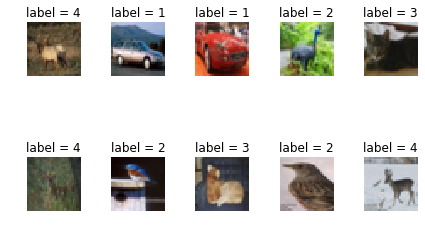

In [0]:
import matplotlib.pyplot as plt
 
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    #image = trainX[i][0].reshape(28, 28)   # not necessary to reshape if ndim is set to 2
    image = x_train_1[i]
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    x= 0
    y =0
    for x,y in enumerate(y_train_1[i]):
      if y > 0:
        plt.title('label = {}'.format(x))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
#plt.savefig('images/mnist_plot.png')
plt.show()

Text(0.5, 1.0, 'label = 1')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 4')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 4')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 2')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 3')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 2')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 2')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 4')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 4')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'label = 4')

(-0.5, 31.5, 31.5, -0.5)

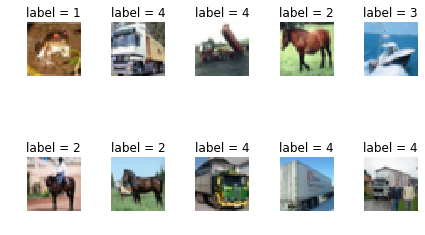

In [0]:
import matplotlib.pyplot as plt
 
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    #image = trainX[i][0].reshape(28, 28)   # not necessary to reshape if ndim is set to 2
    image = x_train_2[i]
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    x= 0
    y =0
    for x,y in enumerate(y_train_2[i]):
      if y > 0:
        plt.title('label = {}'.format(x))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
#plt.savefig('images/mnist_plot.png')
plt.show()

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
y_train_2 = np_utils.to_categorical(y_train_2)
y_test_2 = np_utils.to_categorical(y_test_2)


y_train_1 = np_utils.to_categorical(y_train_1)
y_test_1 = np_utils.to_categorical(y_test_1)

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


In [0]:
model.fit(x_train_1, y_train_1, batch_size=40, epochs=10,validation_data=(x_test_1, y_test_1))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 214us/step - loss: 1.0837 - acc: 0.5512 - val_loss: 0.8225 - val_acc: 0.6728
Epoch 2/10
25000/25000 [==============================] - 5s 185us/step - loss: 0.8202 - acc: 0.6761 - val_loss: 0.7150 - val_acc: 0.7274
Epoch 3/10
25000/25000 [==============================] - 5s 185us/step - loss: 0.6994 - acc: 0.7290 - val_loss: 0.6688 - val_acc: 0.7428
Epoch 4/10
25000/25000 [==============================] - 5s 185us/step - loss: 0.6192 - acc: 0.7621 - val_loss: 0.6251 - val_acc: 0.7588
Epoch 5/10
25000/25000 [==============================] - 5s 185us/step - loss: 0.5603 - acc: 0.7869 - val_loss: 0.5407 - val_acc: 0.8004
Epoch 6/10
25000/25000 [==============================] - 5s 185us/step - loss: 0.5179 - acc: 0.8028 - val_loss: 0.5112 - val_acc: 0.8126
Epoch 7/10
25000/25000 [==============================] - 5s 185us/step - loss: 0.4731 - acc: 0.8221 - val_loss: 0.5050 - v

In [0]:
test_metrics = model.evaluate(x_test_1, y_test_1)
print('Test loss:', test_metrics[0])
print('Test accuracy:', test_metrics[1])

5000/5000 [==============================] - 0s 77us/step
Test loss: 0.4686047847747803
Test accuracy: 0.8314


### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [0]:
model.layers

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [0]:
print("After flatten_4 dense starts so considering till flatten_4")

After flatten_4 dense starts so considering till flatten_4


In [0]:
model_trans = Model(inputs=model.input, outputs=model.get_layer('flatten_4').output )
#model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output )
model_trans.trainable = False

In [0]:
x_train_2_trans = model_trans.predict(x_train_2)
x_test_2_trans = model_trans.predict(x_test_2)

In [0]:
model_transfer = Sequential()
model_transfer.add(Dense(512, input_dim=2304, activation='relu'))
model_transfer.add(Dropout(0.25))
#model_transfer.add(Dense(128, activation='relu'))
model_transfer.add(Dense(5, activation='softmax'))

In [0]:
model_transfer.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_transfer.fit(x_train_2_trans, y_train_2, batch_size=40, epochs=10,validation_data=(x_test_2_trans, y_test_2))#

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 3s 125us/step - loss: 0.5020 - acc: 0.8171 - val_loss: 0.4223 - val_acc: 0.8514
Epoch 2/10
25000/25000 [==============================] - 3s 104us/step - loss: 0.3479 - acc: 0.8704 - val_loss: 0.3918 - val_acc: 0.8602
Epoch 3/10
25000/25000 [==============================] - 3s 103us/step - loss: 0.2663 - acc: 0.9043 - val_loss: 0.3829 - val_acc: 0.8674
Epoch 4/10
25000/25000 [==============================] - 3s 103us/step - loss: 0.1968 - acc: 0.9314 - val_loss: 0.3880 - val_acc: 0.8670
Epoch 5/10
25000/25000 [==============================] - 3s 103us/step - loss: 0.1326 - acc: 0.9572 - val_loss: 0.3973 - val_acc: 0.8696
Epoch 6/10
25000/25000 [==============================] - 3s 105us/step - loss: 0.0871 - acc: 0.9742 - val_loss: 0.4458 - val_acc: 0.8634
Epoch 7/10
25000/25000 [==============================] - 3s 104us/step - loss: 0.0584 - acc: 0.9840 - val_loss: 0.4592 - v

In [0]:
test_metrics = model_transfer.evaluate(x_test_2_trans, y_test_2)
print('Test loss:', test_metrics[0])
print('Test accuracy:', test_metrics[1])

5000/5000 [==============================] - 0s 51us/step
Test loss: 0.5292540444135666
Test accuracy: 0.8688


# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [4]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [6]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [7]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [8]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [9]:
twenty_train.filenames.shape


(2257,)

In [10]:
twenty_train.target.shape

(2257,)

In [11]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

In [12]:
type(twenty_train.target)

numpy.ndarray

In [13]:
twenty_train.data[1:5]

["From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the problem:\n\tI have a rectangular mesh in the uv domain, i.e  the mesh is a \n\tmapping of a 3d Bezier patch into 2d. The area in this domain\n\twhich is inside a trimming loop had to be rendered. The trimming\n\tloop is a set of 2d Bezier curve segments.\n\tFor the sake of notation: the mesh is made up of cells.\n\n\tMy problem is this :\n\tThe trimming area has to be split up into individual smaller\n\tcells bounded by the trimming curve segments. If a cell\n\tis wholly inside the area...then it is output as a whole ,\n\telse it is trivially rejected. \n\n\tDoes any body know how thiss can be done, or is there any algo. \n\tsomewhere for doing this.\n\n\tAny help would be appreciated.\n\n\tThanks, \n\tAni.

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),stop_words='english', max_features=5000)
vectors = vectorizer.fit_transform(twenty_train.data)

In [0]:
vectors_test = vectorizer.transform(twenty_test.data)

In [25]:
vectors.shape

(2257, 5000)

In [18]:
vectors_test.shape

(1502, 5000)

In [26]:
vectorizer.get_feature_names()

['00',
 '00 08',
 '000',
 '01',
 '02',
 '03',
 '0358',
 '0358 athens',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '10 05',
 '10 april',
 '100',
 '1000',
 '101',
 '11',
 '12',
 '128',
 '129',
 '13',
 '13 00',
 '130',
 '14',
 '14 article',
 '141',
 '15',
 '15 article',
 '150',
 '16',
 '16 1993',
 '16 apr',
 '16 article',
 '17',
 '17 article',
 '18',
 '18 article',
 '19',
 '19 05',
 '19 article',
 '192',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1993apr14',
 '1993apr15',
 '1993apr16',
 '1993apr17',
 '1993apr19',
 '1993apr20',
 '1993apr22',
 '1993apr3',
 '1993apr5',
 '1993apr6',
 '1st',
 '20',
 '20 1993',
 '20 article',
 '200',
 '2000',
 '2000 years',
 '206',
 '21',
 '21 03',
 '21 article',
 '212',
 '214',
 '22',
 '22 article',
 '23',
 '24',
 '24 bit',
 '241',
 '241 9760',
 '245',
 '25',
 '256',
 '256 color',
 '256 colors',
 '26',
 '26 article',
 '27',
 '27 article',
 '28',
 '28 article',
 '29',
 '2d',
 '30',
 '300',
 '301',
 '30602',
 '30602 7415',
 '30pm',
 

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [27]:

from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(vectors, twenty_train.target)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
from sklearn import metrics
pred = logReg.predict(vectors_test)
metrics.f1_score(twenty_test.target, pred, average='macro')

0.8960017730130446